In [1]:
#Import Library
import numpy as np
import pandas as pd
import sklearn

In [2]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 2000)

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df=pd.DataFrame(df_train)
df

Type                                             Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  Quantity   Fee  State                         RescuerID  VideoAmt                                        Description      PetID  PhotoAmt  AdoptionSpeed
0         2                                           Nibble    3     299       0       1       1       7       0             1          1           2         2           2       1         1   100  41326  8480853f516546f6cf33aa88cd76c379         0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0              2
1         2                                      No Name Yet    1     265       0       1       1       2       0             2          2           3         3           3       1         1     0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0  I just found it alone yesterday near my apartm...  6296e909a       2.0              0
2         1                                           Brisco    1     307       0       1       2       7       0             2          2           1         1           2       1         1     0  41326  fa90fa5b1ee11c86938398b60abc32cb         0  Their pregnant mother was dumped by her irresp...  3422e4906       7.0              3
3         1                                             Miko    4     307       0       2       1       2       0             2          1           1         1           2       1         1   150  41401  9238e4f44c71a75282e62f7136c6b240         0  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0              2
4         1                                           Hunter    1     307       0       1       1       0       0             2          1           2         2           2       1         1     0  41326  95481e953f8aed9ec3d16fc4509537e8         0  This handsome yet cute boy is up for adoption....  850a43f90       3.0              2
5         2                                              NaN    3     266       0       2       5       6       0             2          1           2         2           2       1         1     0  41326  22fe332bf9c924d4718005891c63fbed         0  This is a stray kitten that came to my house. ...  d24c30b4b       2.0              2
6         2                                            BULAT   12     264     264       1       1       0       0             2          3           2         2           3       1         1   300  41326  1e0b5a458b5b77f5af581d57ebf570b3         0  anyone within the area of ipoh or taiping who ...  1caa6fcdb       3.0              1
7         1                          Siu Pak & Her 6 Puppies    0     307       0       2       1       2       7             2          1           2         2           2       1         6     0  41326  1fba5f6e5480946254590d48f9c5198d         0  Siu Pak just give birth on 13/6/10 to 6puppies...  97aa9eeac       9.0              3
8         2                                              NaN    2     265       0       2       6       0       0             2          2           2         2           2       1         1     0  41326  d8af7afece71334473575c9f70daf00d         0  healthy and active, feisty kitten found in nei...  c06d167ca       6.0              1
9         2                                            Kitty   12     265       0       2       1       7       0             2          2           3         3           3       1         1     0  41326  1f3f36e4b18e94855b3e88af0852fdc4         0  Very manja and gentle stray cat found, we woul...  7a0942d61       2.0              4
10        1                                             Bear    2     307       0       1       1       2       7             2          1           2         1           2       1         1     0  41401  9238e4f44c71a75282e62f7136c6b240         0  For serious adopter, please do sms or call for...  8b693ca84       7.0   

### I have added Energetic Level for Dogs and Personality, Vocalize, and Playfullness for Cats

In [6]:
df_label = pd.read_csv('breed_labels.csv')

#df_label

In [7]:
df_state = pd.read_csv('state_labels.csv')

#df_state

### I have joined the training csv and breed_label csv based on BreedID for only Breed 1 in training data.

In [8]:
pd_train_new=pd.merge(df_train, df_label, left_on='Breed1', right_on='BreedID', how='left')
#pd_train_new

In [9]:
pd_train_new=pd.merge(pd_train_new, df_state, left_on='State', right_on='StateID', how='left')
#pd_train_new

In [10]:
#Rename the columns to avoid confusion
pd_train_new.rename(columns = {'BreedName':'BreedName B1'}, inplace = True)
pd_train_new.rename(columns = {'Energetic Level':'Energetic Level B1'}, inplace = True)
pd_train_new.rename(columns = {'Personality':'Personality B1'}, inplace = True)
pd_train_new.rename(columns = {'Vocalize':'Vocalize B1'}, inplace = True)
pd_train_new.rename(columns = {'Playfullness':'Playfulness B1'}, inplace = True)
pd_train_new.rename(columns = {'Type_x':'Type'}, inplace = True)
pd_train_new.drop(['Type_y','StateID','BreedID'],axis=1, inplace = True)
#pd_train_new

### Replace breed1 value with breed2 value when breed1 equals to 0 while breed 2 has value.

In [11]:
pd_train_new[pd_train_new['Breed1']== 0]

Type                                Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  Quantity  Fee  State                         RescuerID  VideoAmt                                        Description      PetID  PhotoAmt  AdoptionSpeed BreedName B1 Energetic Level B1 Personality B1  Vocalize B1  Playfulness B1     StateName  Population
391      1                            Lil Milo    2       0      26       2       2       0       0             2          1           1         1           2       1         1    0  41326  1a2113010d6048d5410b265347b35c91         0  Milo went missing after a week with her new ad...  375905770       3.0              3          NaN                NaN            NaN          NaN             NaN      Selangor      5874.1
1045     1               Bella 4 Months Puppy!    4       0     307       2       2       3       0             2          1           1         1           2       1         1  100  41326  3673e167fc9932b13149bed1f2a0180a         0  She's only 4 months old, very friendly and lov...  da8d4a273       5.0              4          NaN                NaN            NaN          NaN             NaN      Selangor      5874.1
3219     2                                 NaN    3       0     266       3       1       4       7             1          1           2         1           2       1         3    0  41401  f7cff59d10c867bdee12c3f35f34d086         0  Mama cat came to house and gave birth to these...  27e74e45c      11.0              2          NaN                NaN            NaN          NaN             NaN  Kuala Lumpur      1768.0
7285     1                           "Boy Boy"   72       0     307       1       1       2       0             2          2           2         2           2       1         1    0  41326  94b991f8dc1e0bb903ca8d4d492c8d43         0  He is a stray dog found wandering around Unive...  7b5bee232       5.0              4          NaN                NaN            NaN          NaN             NaN      Selangor      5874.1
7706     1  Looking Newborn Puppy For Adoption    2       0     205       2       2       5       7             1          1           2         2           2       1         1    1  41336  5232bdd1444960a257ccec9a41404320         0  I want to adopt a newborn puppy Prefer small b...  0327b8e94       0.0              3          NaN                NaN            NaN          NaN             NaN         Johor      3553.6

In [12]:
pd_train_new['Breed1 New']=np.where((pd_train_new['Breed1']== 0) &(pd_train_new['Breed2']!=0),pd_train_new['Breed2'],pd_train_new['Breed1'])

### Next, I have created the 'Mixed Breed' indicator. If Breed1 equals to 307, or if breed1 and breed2 are not the same, then it is a mixed breed.

In [13]:
pd_train_new['MixedBreed']=np.where((pd_train_new['Breed1 New']==307)|((pd_train_new['Breed1 New']!=pd_train_new['Breed2'])&(pd_train_new['Breed2']!=0)) , '1', '0')


### Next, I have created the 'Fee Flag' indicator. If the fee is larger than 0, then it is 'Yes', else it is 'No'.

In [14]:
pd_train_new['Fee Flag']=np.where(pd_train_new['Fee']>0,'1', '0')

### Next, I have created 'Adopted Flag' indicator. If the Adoption Speed is equal to 4, then it is not adopted, otherwise it is 'Yes'.

In [15]:
pd_train_new['Adopted Flag']=np.where(pd_train_new['AdoptionSpeed']==4,'0', '1')

In [16]:
pd_train_new['Video Flag']=np.where(pd_train_new['VideoAmt']>0,'1','0')

In [17]:
pd_train_new['Photo Flag']=np.where(pd_train_new['PhotoAmt']>0,'1','0')

In [18]:
pd_train_new['Name Flag'] = np.where(pd_train_new['Name'].isnull(), 0,1 )

In [19]:
pd_train_new['Description Flag']= np.where(pd_train_new['Description'].isnull(), 0,1 )

### This is to understand what's the 1% and 99% percentile for Age.

In [20]:
pd_train_new.Age.quantile(0.99)

84.0

In [21]:
pd_train_new.Age.quantile(0.02)

1.0

### Create the new variable 'New Age', where if it is <0, than it will be equal to 1(2% percentile), >84, then it will be 99% percentile)

In [22]:
pd_train_new['New Age']=np.where(pd_train_new['Age']==0,1,pd_train_new['Age'])
pd_train_new['New Age']=np.where(pd_train_new['Age']>84,84,pd_train_new['Age'])


### Here's a summary of null values for each variable in our dataframe.

In [23]:
pd_train_new.isnull().sum()

Type                     0
Name                  1257
Age                      0
Breed1                   0
Breed2                   0
Gender                   0
Color1                   0
Color2                   0
Color3                   0
MaturitySize             0
FurLength                0
Vaccinated               0
Dewormed                 0
Sterilized               0
Health                   0
Quantity                 0
Fee                      0
State                    0
RescuerID                0
VideoAmt                 0
Description             12
PetID                    0
PhotoAmt                 0
AdoptionSpeed            0
BreedName B1             5
Energetic Level B1    6857
Personality B1        8145
Vocalize B1           8145
Playfulness B1        8145
StateName                0
Population               0
Breed1 New               0
MixedBreed               0
Fee Flag                 0
Adopted Flag             0
Video Flag               0
Photo Flag               0
N

In [24]:
print(df.describe())

               Type           Age        Breed1        Breed2        Gender        Color1        Color2        Color3  MaturitySize     FurLength    Vaccinated      Dewormed    Sterilized        Health      Quantity           Fee         State      VideoAmt      PhotoAmt  AdoptionSpeed
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   14993.000000
mean       1.457614     10.452078    265.272594     74.009738      1.776162      2.234176      3.222837      1.882012      1.862002      1.467485      1.731208      1.558727      1.914227      1.036617      1.576069     21.259988  41346.028347      0.056760      3.889215       2.516441
std        0.498217     18.155790     60.056818    123.011575      0.681592      1.745225      2.742562      2.984086      0.547959      0.

In [25]:
pd_age=pd_train_new['New Age']
pd_age.describe()

count    14993.000000
mean        10.154339
std         16.363657
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max         84.000000
Name: New Age, dtype: float64

### This is the correlation table for all original variables in training cvs.

In [26]:
df.corr()

Type       Age    Breed1    Breed2    Gender    Color1    Color2    Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized    Health  Quantity       Fee     State  VideoAmt  PhotoAmt  AdoptionSpeed
Type           1.000000 -0.147162  0.057724 -0.043568  0.060843  0.097680  0.246333  0.201693     -0.171811   0.003036    0.102907  0.025508    0.006737 -0.006864  0.036423 -0.042134  0.124549 -0.005967  0.049368      -0.091240
Age           -0.147162  1.000000 -0.314346 -0.041010 -0.123423  0.090378 -0.039427 -0.053546      0.093673   0.153092   -0.136061 -0.053360   -0.189450  0.103215 -0.113076  0.089168  0.024523 -0.015969 -0.084778       0.100510
Breed1         0.057724 -0.314346  1.000000 -0.157053  0.071321 -0.035510 -0.007081 -0.000682     -0.010507  -0.108059    0.046518  0.013216    0.052698 -0.034893  0.090194 -0.189526 -0.026832  0.020626  0.043395       0.107834
Breed2        -0.043568 -0.041010 -0.157053  1.000000  0.056907 -0.020324  0.003015  0.035679      0.049879   0.106220    0.005638 -0.009817   -0.005989 -0.029285  0.038125  0.013508 -0.037993  0.001569  0.045953      -0.018642
Gender         0.060843 -0.123423  0.071321  0.056907  1.000000 -0.115351  0.026507  0.259309     -0.091819  -0.030404    0.078702  0.091431    0.040645 -0.045177  0.494489 -0.050491  0.002564  0.016816  0.098435       0.057622
Color1         0.097680  0.090378 -0.035510 -0.020324 -0.115351  1.000000 -0.113290 -0.282897     -0.029468   0.066967   -0.017475 -0.019318   -0.037050  0.024410 -0.116688  0.054180  0.024012 -0.006435 -0.041323      -0.044192
Color2         0.246333 -0.039427 -0.007081  0.003015  0.026507 -0.113290  1.000000  0.088742     -0.065155  -0.008764    0.026193  0.005812    0.007370 -0.004307  0.019876 -0.017308  0.026944  0.023983  0.059113      -0.038579
Color3         0.201693 -0.053546 -0.000682  0.035679  0.259309 -0.282897  0.088742  1.000000     -0.051730   0.013581    0.054053  0.048617    0.038899 -0.024782  0.272548 -0.019839  0.010554  0.019526  0.103662      -0.007014
MaturitySize  -0.171811  0.093673 -0.010507  0.049879 -0.091819 -0.029468 -0.065155 -0.051730      1.000000   0.095142   -0.087722 -0.067352   -0.066321 -0.012957 -0.042832  0.041144 -0.062584  0.017032  0.015593       0.045653
FurLength      0.003036  0.153092 -0.108059  0.106220 -0.030404  0.066967 -0.008764  0.013581      0.095142   1.000000   -0.006010  0.016463    0.032092  0.028096 -0.038388  0.159693 -0.029317 -0.014740 -0.031557      -0.091337
Vaccinated     0.102907 -0.136061  0.046518  0.005638  0.078702 -0.017475  0.026193  0.054053     -0.087722  -0.006010    1.000000  0.722596    0.471204  0.078893  0.125287 -0.121868  0.032737 -0.032685 -0.052719      -0.059043
Dewormed       0.025508 -0.053360  0.013216 -0.009817  0.091431 -0.019318  0.005812  0.048617     -0.067352   0.016463    0.722596  1.000000    0.426256  0.072188  0.141355 -0.105978 -0.001310 -0.036961 -0.099026      -0.013210
Sterilized     0.006737 -0.189450  0.052698 -0.005989  0.040645 -0.037050  0.007370  0.038899     -0.066321   0.032092    0.471204  0.426256    1.000000  0.057916  0.101919 -0.063790  0.009951 -0.018720 -0.062067      -0.083447
Health        -0.006864  0.103215 -0.034893 -0.029285 -0.045177  0.024410 -0.004307 -0.024782     -0.012957   0.028096    0.078893  0.072188    0.057916  1.000000 -0.034567 -0.010073  0.026237 -0.004984 -0.023978       0.029382
Quantity       0.036423 -0.113076  0.090194  0.038125  0.494489 -0.116688  0.019876  0.272548     -0.042832  -0.038388    0.125287  0.141355    0.101919 -0.034567  1.000000 -0.060523 -0.002182  0.008344  0.137839       0.062931
Fee           -0.042134  0.089168 -0.189526  0.013508 -0.050491  0.054180 -0.017308 -0.019839      0.041144   0.159693   -0.121868 -0.105978   -0.063790 -0.010073 -0.060523  1.000000 -0.015758 -0.000839  0.005103      -0.004017
State          0.124549  0.024523 -0.026832 -0.037993  0.002564  0.024012  0.026944  0.010554     -0.062584  -0.029317    0.032737 -0.001310   

In [27]:
pd_train_new['MixedBreed']=pd_train_new['MixedBreed'].astype(str).astype(int)
pd_train_new['Fee Flag']=pd_train_new['Fee Flag'].astype(str).astype(int)
pd_train_new['Adopted Flag']=pd_train_new['Adopted Flag'].astype(str).astype(int)
pd_train_new['Video Flag']=pd_train_new['Video Flag'].astype(str).astype(int)
pd_train_new['Photo Flag']=pd_train_new['Photo Flag'].astype(str).astype(int)

In [28]:
pd_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 40 columns):
Type                  14993 non-null int64
Name                  13736 non-null object
Age                   14993 non-null int64
Breed1                14993 non-null int64
Breed2                14993 non-null int64
Gender                14993 non-null int64
Color1                14993 non-null int64
Color2                14993 non-null int64
Color3                14993 non-null int64
MaturitySize          14993 non-null int64
FurLength             14993 non-null int64
Vaccinated            14993 non-null int64
Dewormed              14993 non-null int64
Sterilized            14993 non-null int64
Health                14993 non-null int64
Quantity              14993 non-null int64
Fee                   14993 non-null int64
State                 14993 non-null int64
RescuerID             14993 non-null object
VideoAmt              14993 non-null int64
Description           14981 n

### This is the correlation table for all new variables we have.

In [29]:
pd_train_new.corr()

Type       Age    Breed1    Breed2    Gender    Color1    Color2    Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized    Health  Quantity       Fee     State  VideoAmt  PhotoAmt  AdoptionSpeed  Vocalize B1  Playfulness B1  Population  Breed1 New  MixedBreed  Fee Flag  Adopted Flag  Video Flag  Photo Flag  Name Flag  Description Flag   New Age
Type              1.000000 -0.147162  0.057724 -0.043568  0.060843  0.097680  0.246333  0.201693     -0.171811   0.003036    0.102907  0.025508    0.006737 -0.006864  0.036423 -0.042134  0.124549 -0.005967  0.049368      -0.091240          NaN             NaN   -0.048444    0.057336   -0.668290  0.026887      0.041032    0.001626    0.008123  -0.015834         -0.016610 -0.154420
Age              -0.147162  1.000000 -0.314346 -0.041010 -0.123423  0.090378 -0.039427 -0.053546      0.093673   0.153092   -0.136061 -0.053360   -0.189450  0.103215 -0.113076  0.089168  0.024523 -0.015969 -0.084778       0.100510    -0.115895       -0.122176   -0.018512   -0.314389   -0.118895  0.048670     -0.110439   -0.025971   -0.032351   0.051276         -0.007350  0.975302
Breed1            0.057724 -0.314346  1.000000 -0.157053  0.071321 -0.035510 -0.007081 -0.000682     -0.010507  -0.108059    0.046518  0.013216    0.052698 -0.034893  0.090194 -0.189526 -0.026832  0.020626  0.043395       0.107834    -0.263377       -0.161556   -0.005105    0.997205    0.281357 -0.099961     -0.102662    0.025980    0.043207  -0.030822         -0.001207 -0.335632
Breed2           -0.043568 -0.041010 -0.157053  1.000000  0.056907 -0.020324  0.003015  0.035679      0.049879   0.106220    0.005638 -0.009817   -0.005989 -0.029285  0.038125  0.013508 -0.037993  0.001569  0.045953      -0.018642    -0.229552       -0.262302    0.055619   -0.155483    0.405563  0.035425      0.028090   -0.011672    0.004195   0.037473          0.000961 -0.040521
Gender            0.060843 -0.123423  0.071321  0.056907  1.000000 -0.115351  0.026507  0.259309     -0.091819  -0.030404    0.078702  0.091431    0.040645 -0.045177  0.494489 -0.050491  0.002564  0.016816  0.098435       0.057622     0.043495        0.028737   -0.021504    0.071851    0.016330 -0.055227     -0.043473    0.005346   -0.017938  -0.120534          0.011468 -0.130727
Color1            0.097680  0.090378 -0.035510 -0.020324 -0.115351  1.000000 -0.113290 -0.282897     -0.029468   0.066967   -0.017475 -0.019318   -0.037050  0.024410 -0.116688  0.054180  0.024012 -0.006435 -0.041323      -0.044192    -0.057368       -0.087750   -0.023196   -0.036136   -0.117274  0.065127      0.024673   -0.001876   -0.017469   0.022114          0.005149  0.095715
Color2            0.246333 -0.039427 -0.007081  0.003015  0.026507 -0.113290  1.000000  0.088742     -0.065155  -0.008764    0.026193  0.005812    0.007370 -0.004307  0.019876 -0.017308  0.026944  0.023983  0.059113      -0.038579     0.023290        0.047415   -0.009069   -0.007082   -0.167003  0.000456      0.036686    0.020544    0.028872  -0.001746         -0.014900 -0.043366
Color3            0.201693 -0.053546 -0.000682  0.035679  0.259309 -0.282897  0.088742  1.000000     -0.051730   0.013581    0.054053  0.048617    0.038899 -0.024782  0.272548 -0.019839  0.010554  0.019526  0.103662      -0.007014     0.035878        0.039871   -0.001931   -0.000234   -0.114040 -0.005990     -0.000508    0.015461   -0.010530  -0.053093          0.012318 -0.054595
MaturitySize     -0.171811  0.093673 -0.010507  0.049879 -0.091819 -0.029468 -0.065155 -0.051730      1.000000   0.095142   -0.087722 -0.067352   -0.066321 -0.012957 -0.042832  0.041144 -0.062584  0.017032  0.015593       0.045653    -0.092719       -0.088205    0.051057   -0.011181    0.169903  0.030418     -0.022822    0.010284    0.019549   0.056454         -0.011432  0.102296
FurLength         0.003036  0.153092 -0.108059  0.106220 -0.030404  0.066967 -0.008764  0.013581      0.095142   1.000000   -0.006010  0.016463    0.032092  0.028096 -0.038388  0.159693 -0.029

In [30]:
ADS_Type=df.groupby(["AdoptionSpeed","Type" ]).size()
ADS_Type

AdoptionSpeed  Type
0              1        170
               2        240
1              1       1435
               2       1655
2              1       2164
               2       1873
3              1       1949
               2       1310
4              1       2414
               2       1783
dtype: int64

### We could see that Most Cats and Dogs have been adopted.

In [31]:
ADS_Type1=pd_train_new.groupby(["Adopted Flag","Type"]).size().to_frame('Count')
ADS_Type1['Percentage%']=ADS_Type1['Count']/ADS_Type1['Count'].sum()*100
ADS_Type1.sort_values(by='Count', ascending=False)

Count  Percentage%
Adopted Flag Type                    
1            1      5718    38.137798
             2      5078    33.869139
0            1      2414    16.100847
             2      1783    11.892216

In [32]:
Freq_Type=pd_train_new.groupby(["Type"]).size().to_frame('Count')
Freq_Type['Percentage%']=Freq_Type['Count']/Freq_Type['Count'].sum()*100
Freq_Type.sort_values(by='Count', ascending=False)

Count  Percentage%
Type                    
1      8132    54.238645
2      6861    45.761355

In [33]:
Freq_Type=df.groupby(["Type" ]).size()
Freq_Type

Type
1    8132
2    6861
dtype: int64

In [34]:
type_adp=pd.crosstab(pd_train_new["Type"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
type_adp

Adopted Flag         0         1
Type                            
1             0.296852  0.703148
2             0.259875  0.740125

In [35]:
type_adp1=pd.crosstab(pd_train_new["Type"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
type_adp1

AdoptionSpeed         0         1         2         3         4
Type                                                           
1              0.020905  0.176463  0.266109  0.239670  0.296852
2              0.034980  0.241218  0.272992  0.190934  0.259875

In [36]:
ADS_Age=df.groupby(["Age","AdoptionSpeed" ]).size().to_frame('Count')
ADS_Age['Percentage%']=ADS_Age['Count']/ADS_Age['Count'].sum()*100
ADS_Age.sort_values(by='Count', ascending=False)

Count  Percentage%
Age AdoptionSpeed                    
2   2               1120     7.470153
    1                865     5.769359
    3                783     5.222437
1   2                754     5.029014
    1                643     4.288668
2   4                620     4.135263
3   2                586     3.908491
1   3                511     3.408257
3   4                470     3.134796
    3                458     3.054759
12  4                428     2.854666
3   1                408     2.721270
4   4                349     2.327753
1   4                342     2.281064
24  4                285     1.900887
4   2                265     1.767491
    3                260     1.734143
6   4                226     1.507370
4   1                211     1.407323
12  2                200     1.333956
5   4                196     1.307277
12  3                185     1.233909
36  4                183     1.220570
5   2                157     1.047155
24  3                143     0.953778
5   3                135     0.900420
8   4                131     0.873741
12  1                121     0.807043
6   2                117     0.780364
2   0                115     0.767025
6   3                115     0.767025
24  1                110     0.733676
7   4                110     0.733676
5   1                100     0.666978
24  2                 97     0.646969
48  4                 92     0.613620
6   1                 80     0.533582
36  2                 78     0.520243
    1                 77     0.513573
9   4                 73     0.486894
36  3                 71     0.473554
8   3                 70     0.466885
    2                 68     0.453545
7   3                 62     0.413526
10  4                 61     0.406857
7   2                 59     0.393517
48  2                 58     0.386847
18  4                 58     0.386847
60  4                 54     0.360168
1   0                 54     0.360168
9   2                 51     0.340159
0   1                 50     0.333489
60  2                 48     0.320149
11  4                 48     0.320149
48  1                 47     0.313480
60  3                 46     0.306810
    1                 45     0.300140
0   2                 44     0.293470
3   0                 44     0.293470
7   1                 43     0.286801
48  3                 42     0.280131
0   3                 39     0.260121
18  2                 38     0.253452
10  2                 37     0.246782
0   4                 36     0.240112
8   1                 36     0.240112
14  4                 35     0.233442
10  3                 34     0.226772
18  3                 34     0.226772
72  4                 33     0.220103
12  0                 33     0.220103
84  3                 31     0.206763
    4                 31     0.206763
9   3                 31     0.206763
15  4                 30     0.200093
72  2                 30     0.200093
17  4                 29     0.193424
72  3                 28     0.186754
18  1                 27     0.180084
16  4                 26     0.173414
84  2                 26     0.173414
10  1                 26     0.173414
4   0                 24     0.160075
9   1                 24     0.160075
6   0                 20     0.133396
11  3                 18     0.120056
13  4                 18     0.120056
15  2                 17     0.113386
11  2                 17     0.113386
15  1                 16     0.106716
14  3                 16     0.106716
30  3                 16     0.106716
24  0                 16     0.106716
120 4                 15     0.100047
15  3                 14     0.093377
96  4                 14     0.093377
84  1                 13     0.086707
20  4                 13     0.086707
21  4                 13     0.086707
30  4                 13     0.086707
19  4                 12     0.080037
17  3                 12     0.080037
    2                 12     0.080037
14  1                 11     

In [37]:
ADS_Age1=pd_train_new.groupby(["Adopted Flag","New Age"]).size().to_frame('Count')
ADS_Age1['Percentage%']=ADS_Age1['Count']/ADS_Age1['Count'].sum()*100
ADS_Age1.sort_values(by='Count', ascending=False)


Count  Percentage%
Adopted Flag New Age                    
1            2         2883    19.228974
             1         1962    13.086107
             3         1496     9.977990
             4          760     5.069032
0            2          620     4.135263
1            12         539     3.595011
0            3          470     3.134796
             12         428     2.854666
1            5          399     2.661242
             24         366     2.441139
0            4          349     2.327753
             1          342     2.281064
1            6          332     2.214367
0            24         285     1.900887
1            36         234     1.560728
0            6          226     1.507370
             5          196     1.307277
             36         183     1.220570
1            8          178     1.187221
             7          171     1.140532
             84         158     1.053825
             48         149     0.993797
             60         145     0.967118
             0          143     0.953778
0            8          131     0.873741
1            9          111     0.740345
0            7          110     0.733676
1            18         107     0.713666
             10         101     0.673648
0            48          92     0.613620
             84          85     0.566931
             9           73     0.486894
1            72          71     0.473554
0            10          61     0.406857
             18          58     0.386847
             60          54     0.360168
1            15          49     0.326819
0            11          48     0.320149
1            11          46     0.306810
             14          41     0.273461
             30          39     0.260121
             17          38     0.253452
0            0           36     0.240112
             14          35     0.233442
             72          33     0.220103
             15          30     0.200093
             17          29     0.193424
             16          26     0.173414
1            16          24     0.160075
             13          22     0.146735
             20          19     0.126726
0            13          18     0.120056
1            29          15     0.100047
             21          15     0.100047
             19          14     0.093377
0            20          13     0.086707
             30          13     0.086707
             21          13     0.086707
             19          12     0.080037
1            42          12     0.080037
             54          12     0.080037
             22          11     0.073368
0            29          10     0.066698
             42          10     0.066698
             26          10     0.066698
1            27           9     0.060028
             32           9     0.060028
0            27           8     0.053358
             22           8     0.053358
1            28           8     0.053358
             41           6     0.040019
0            32           6     0.040019
1            53           6     0.040019
             37           5     0.033349
             38           5     0.033349
0            31           5     0.033349
             25           5     0.033349
1            62           5     0.033349
             25           5     0.033349
0            28           5     0.033349
1            23           4     0.026679
             31           4     0.026679
             46           4     0.026679
0            55           4     0.026679
1            50           4     0.026679
0            50           4     0.026679
1            51           4     0.026679
             65           4     0.026679
0            41           4     0.026679
             23           4     0.026679
             39           4     0.026679
1            52           4     0.026679
0            51           3     0.020009
             49           3     0.020009
1            64           3     0.020009
             49           3     0.020009
    

In [38]:
Freq_Age=df.groupby(["Age"]).size().to_frame('Count')
Freq_Age['Percentage%']=Freq_Age['Count']/Freq_Age['Count'].sum()*100
Freq_Age.sort_values(by='Count', ascending=False)

Count  Percentage%
Age                    
2     3503    23.364237
1     2304    15.367171
3     1966    13.112786
4     1109     7.396785
12     967     6.449677
24     651     4.342026
5      595     3.968519
6      558     3.721737
36     417     2.781298
8      309     2.060962
7      281     1.874208
48     241     1.607417
60     199     1.327286
9      184     1.227239
0      179     1.193890
18     165     1.100514
10     162     1.080504
72     104     0.693657
84     102     0.680317
11      94     0.626959
15      79     0.526913
14      76     0.506903
17      67     0.446875
30      52     0.346829
16      50     0.333489
96      46     0.306810
13      40     0.266791
120     33     0.220103
20      32     0.213433
21      28     0.186754
19      26     0.173414
29      25     0.166744
42      22     0.146735
108     21     0.140065
22      19     0.126726
27      17     0.113386
32      15     0.100047
54      15     0.100047
28      13     0.086707
26      13     0.086707
41      10     0.066698
25      10     0.066698
31       9     0.060028
132      8     0.053358
50       8     0.053358
53       8     0.053358
38       8     0.053358
23       8     0.053358
37       7     0.046688
51       7     0.046688
39       7     0.046688
62       6     0.040019
55       6     0.040019
49       6     0.040019
34       5     0.033349
46       5     0.033349
78       5     0.033349
33       4     0.026679
144      4     0.026679
76       4     0.026679
65       4     0.026679
52       4     0.026679
77       3     0.020009
212      3     0.020009
35       3     0.020009
56       3     0.020009
64       3     0.020009
80       3     0.020009
61       3     0.020009
67       3     0.020009
92       2     0.013340
180      2     0.013340
89       2     0.013340
112      2     0.013340
47       2     0.013340
255      2     0.013340
63       2     0.013340
45       2     0.013340
73       2     0.013340
40       2     0.013340
57       2     0.013340
117      1     0.006670
238      1     0.006670
44       1     0.006670
168      1     0.006670
156      1     0.006670
147      1     0.006670
43       1     0.006670
135      1     0.006670
123      1     0.006670
122      1     0.006670
75       1     0.006670
82       1     0.006670
66       1     0.006670
102      1     0.006670
100      1     0.006670
68       1     0.006670
95       1     0.006670
69       1     0.006670
91       1     0.006670
88       1     0.006670
87       1     0.006670
86       1     0.006670
85       1     0.006670
74       1     0.006670
81       1     0.006670

In [39]:
ADS_Gender=df.groupby(["AdoptionSpeed","Gender" ]).size()
ADS_Gender

AdoptionSpeed  Gender
0              1          160
               2          204
               3           46
1              1         1283
               2         1366
               3          441
2              1         1578
               2         1911
               3          548
3              1         1109
               2         1671
               3          479
4              1         1406
               2         2125
               3          666
dtype: int64

In [40]:
ADS_Gender1=pd_train_new.groupby(["Adopted Flag","Gender"]).size()
ADS_Gender1

Adopted Flag  Gender
0             1         1406
              2         2125
              3          666
1             1         4130
              2         5152
              3         1514
dtype: int64

In [41]:
Freq_Gender=df.groupby(["Gender" ]).size()
Freq_Gender

Gender
1    5536
2    7277
3    2180
dtype: int64

In [42]:
gender_adp=pd.crosstab(pd_train_new["Gender"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
gender_adp

Adopted Flag         0         1
Gender                          
1             0.253974  0.746026
2             0.292016  0.707984
3             0.305505  0.694495

In [43]:
gender_adp1=pd.crosstab(pd_train_new["Gender"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
gender_adp1

AdoptionSpeed         0         1         2         3         4
Gender                                                         
1              0.028902  0.231756  0.285043  0.200325  0.253974
2              0.028034  0.187715  0.262608  0.229628  0.292016
3              0.021101  0.202294  0.251376  0.219725  0.305505

In [44]:
ADS_MatureSize1=pd_train_new.groupby(["Adopted Flag","MaturitySize"]).size().to_frame('Count')
ADS_MatureSize1['Percentage%']=ADS_MatureSize1['Count']/ADS_MatureSize1['Count'].sum()*100
ADS_MatureSize1.sort_values(by='Count',ascending=False)


Count  Percentage%
Adopted Flag MaturitySize                    
1            2              7332    48.902821
0            2              2973    19.829254
1            1              2534    16.901221
             3               900     6.002801
0            1               861     5.742680
             3               360     2.401121
1            4                30     0.200093
0            4                 3     0.020009

In [45]:
Freq_MatureSize=df.groupby(["MaturitySize" ]).size().to_frame('Count')
Freq_MatureSize['Percentage%']=Freq_MatureSize['Count']/Freq_MatureSize['Count'].sum()*100
Freq_MatureSize.sort_values(by='Count',ascending=False)

Count  Percentage%
MaturitySize                    
2             10305    68.732075
1              3395    22.643900
3              1260     8.403922
4                33     0.220103

In [46]:
size_adp=pd.crosstab(pd_train_new["MaturitySize"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
size_adp

Adopted Flag         0         1
MaturitySize                    
1             0.253608  0.746392
2             0.288501  0.711499
3             0.285714  0.714286
4             0.090909  0.909091

In [47]:
size_adp1=pd.crosstab(pd_train_new["MaturitySize"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
size_adp1

AdoptionSpeed         0         1         2         3         4
MaturitySize                                                   
1              0.040943  0.256259  0.260383  0.188807  0.253608
2              0.021931  0.185250  0.275303  0.229015  0.288501
3              0.034127  0.241270  0.242063  0.196825  0.285714
4              0.060606  0.212121  0.333333  0.303030  0.090909

In [48]:
ADS_FurLength=df.groupby(["AdoptionSpeed","FurLength" ]).size()
ADS_FurLength

AdoptionSpeed  FurLength
0              1             194
               2             160
               3              56
1              1            1649
               2            1187
               3             254
2              1            2372
               2            1444
               3             221
3              1            1994
               2            1111
               3             154
4              1            2599
               2            1459
               3             139
dtype: int64

In [49]:
ADS_FurLength1=pd_train_new.groupby(["Adopted Flag","FurLength" ]).size()
ADS_FurLength1

Adopted Flag  FurLength
0             1            2599
              2            1459
              3             139
1             1            6209
              2            3902
              3             685
dtype: int64

In [50]:
Freq_FurLength=df.groupby(["FurLength" ]).size()
Freq_FurLength

FurLength
1    8808
2    5361
3     824
dtype: int64

In [51]:
furlength_adp=pd.crosstab(pd_train_new["FurLength"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
furlength_adp

Adopted Flag         0         1
FurLength                       
1             0.295073  0.704927
2             0.272151  0.727849
3             0.168689  0.831311

In [52]:
furlength_adp1=pd.crosstab(pd_train_new["FurLength"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
furlength_adp1

AdoptionSpeed         0         1         2         3         4
FurLength                                                      
1              0.022025  0.187216  0.269301  0.226385  0.295073
2              0.029845  0.221414  0.269353  0.207237  0.272151
3              0.067961  0.308252  0.268204  0.186893  0.168689

In [53]:
ADS_Vaccinated=df.groupby(["AdoptionSpeed","Vaccinated" ]).size()
ADS_Vaccinated

AdoptionSpeed  Vaccinated
0              1              146
               2              206
               3               58
1              1              965
               2             1777
               3              348
2              1             1473
               2             2112
               3              452
3              1             1419
               2             1459
               3              381
4              1             1895
               2             1673
               3              629
dtype: int64

In [54]:
ADS_Vaccinated1=pd_train_new.groupby(["Adopted Flag","Vaccinated" ]).size()
ADS_Vaccinated1

Adopted Flag  Vaccinated
0             1             1895
              2             1673
              3              629
1             1             4003
              2             5554
              3             1239
dtype: int64

In [55]:
Freq_Vaccinated=df.groupby(["Vaccinated" ]).size()
Freq_Vaccinated

Vaccinated
1    5898
2    7227
3    1868
dtype: int64

In [56]:
vaccine_adp=pd.crosstab(pd_train_new["Vaccinated"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
vaccine_adp

Adopted Flag         0         1
Vaccinated                      
1             0.321295  0.678705
2             0.231493  0.768507
3             0.336724  0.663276

In [57]:
vaccine_adp1=pd.crosstab(pd_train_new["Vaccinated"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
vaccine_adp1

AdoptionSpeed         0         1         2         3         4
Vaccinated                                                     
1              0.024754  0.163615  0.249746  0.240590  0.321295
2              0.028504  0.245883  0.292237  0.201882  0.231493
3              0.031049  0.186296  0.241970  0.203961  0.336724

In [58]:
ADS_Dewormed=df.groupby(["AdoptionSpeed","Dewormed" ]).size()
ADS_Dewormed

AdoptionSpeed  Dewormed
0              1            205
               2            146
               3             59
1              1           1572
               2           1188
               3            330
2              1           2273
               2           1347
               3            417
3              1           1988
               2            914
               3            357
4              1           2359
               2           1220
               3            618
dtype: int64

In [59]:
ADS_Dewormed1=pd_train_new.groupby(["Adopted Flag","Dewormed"]).size()
ADS_Dewormed1

Adopted Flag  Dewormed
0             1           2359
              2           1220
              3            618
1             1           6038
              2           3595
              3           1163
dtype: int64

In [60]:
Freq_Dewormed=df.groupby(["Dewormed" ]).size()
Freq_Dewormed

Dewormed
1    8397
2    4815
3    1781
dtype: int64

In [61]:
dewormed_adp=pd.crosstab(pd_train_new["Dewormed"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
dewormed_adp

Adopted Flag         0         1
Dewormed                        
1             0.280934  0.719066
2             0.253375  0.746625
3             0.346996  0.653004

In [62]:
dewormed_adp=pd.crosstab(pd_train_new["Dewormed"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
dewormed_adp

AdoptionSpeed         0         1         2         3         4
Dewormed                                                       
1              0.024413  0.187210  0.270692  0.236751  0.280934
2              0.030322  0.246729  0.279751  0.189823  0.253375
3              0.033127  0.185289  0.234138  0.200449  0.346996

In [63]:
ADS_Sterilized=df.groupby(["AdoptionSpeed","Sterilized" ]).size()
ADS_Sterilized

AdoptionSpeed  Sterilized
0              1               70
               2              270
               3               70
1              1              364
               2             2378
               3              348
2              1              656
               2             3022
               3              359
3              1              720
               2             2251
               3              288
4              1             1291
               2             2156
               3              750
dtype: int64

In [64]:
ADS_Sterilized1=pd_train_new.groupby(["Adopted Flag","Sterilized"]).size()
ADS_Sterilized1

Adopted Flag  Sterilized
0             1             1291
              2             2156
              3              750
1             1             1810
              2             7921
              3             1065
dtype: int64

In [65]:
Freq_Sterilized=df.groupby(["Sterilized" ]).size()
Freq_Sterilized

Sterilized
1     3101
2    10077
3     1815
dtype: int64

In [66]:
sterilized_adp=pd.crosstab(pd_train_new["Sterilized"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
sterilized_adp

Adopted Flag         0         1
Sterilized                      
1             0.416317  0.583683
2             0.213953  0.786047
3             0.413223  0.586777

In [67]:
sterilized_adp1=pd.crosstab(pd_train_new["Sterilized"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
sterilized_adp1

AdoptionSpeed         0         1         2         3         4
Sterilized                                                     
1              0.022573  0.117381  0.211545  0.232183  0.416317
2              0.026794  0.235983  0.299891  0.223380  0.213953
3              0.038567  0.191736  0.197796  0.158678  0.413223

In [68]:
ADS_Health=df.groupby(["AdoptionSpeed","Health" ]).size()
ADS_Health

AdoptionSpeed  Health
0              1          392
               2           17
               3            1
1              1         2999
               2           89
               3            2
2              1         3925
               2          106
               3            6
3              1         3150
               2           98
               3           11
4              1         4012
               2          171
               3           14
dtype: int64

In [69]:
ADS_Health1=pd_train_new.groupby(["Adopted Flag","Health"]).size()
ADS_Health1

Adopted Flag  Health
0             1          4012
              2           171
              3            14
1             1         10466
              2           310
              3            20
dtype: int64

In [70]:
Freq_Health=df.groupby(["Health" ]).size()
Freq_Health

Health
1    14478
2      481
3       34
dtype: int64

In [71]:
health_adp=pd.crosstab(pd_train_new["Health"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
health_adp

Adopted Flag         0         1
Health                          
1             0.277110  0.722890
2             0.355509  0.644491
3             0.411765  0.588235

In [72]:
health_adp1=pd.crosstab(pd_train_new["Health"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
health_adp1

AdoptionSpeed         0         1         2         3         4
Health                                                         
1              0.027076  0.207142  0.271101  0.217571  0.277110
2              0.035343  0.185031  0.220374  0.203742  0.355509
3              0.029412  0.058824  0.176471  0.323529  0.411765

In [73]:
ADS_State=df.groupby(["AdoptionSpeed","State" ]).size()
ADS_State

AdoptionSpeed  State
0              41324       4
               41325       3
               41326     246
               41327       8
               41330       3
               41332       4
               41335       3
               41336      23
               41342       1
               41345       1
               41367       2
               41401     112
1              41324      18
               41325      14
               41326    1877
               41327     122
               41330      48
               41332      36
               41335      29
               41336     113
               41342       1
               41345       6
               41361       9
               41367       3
               41401     814
2              41324      23
               41325      34
               41326    2435
               41327     216
               41330     111
               41332      63
               41335      14
               41336     136
               41345  

In [74]:
ADS_State1=pd_train_new.groupby(["Adopted Flag","StateName" ]).size()
ADS_State1

Adopted Flag  StateName      
0             Johor               132
              Kedah                36
              Kelantan              6
              Kuala Lumpur       1192
              Labuan                1
              Melaka               80
              Negeri Sembilan     108
              Pahang               23
              Perak               141
              Pulau Pinang        300
              Sabah                 8
              Sarawak               9
              Selangor           2152
              Terengganu            9
1             Johor               375
              Kedah                74
              Kelantan              9
              Kuala Lumpur       2653
              Labuan                2
              Melaka               57
              Negeri Sembilan     145
              Pahang               62
              Perak               279
              Pulau Pinang        543
              Sabah                14
              Sarawa

In [75]:
Freq_State=pd_train_new.groupby(["StateName","State"]).size().to_frame('Count')
Freq_State.sort_values(by="Count",ascending=False)

Count
StateName       State       
Selangor        41326   8714
Kuala Lumpur    41401   3845
Pulau Pinang    41327    843
Johor           41336    507
Perak           41330    420
Negeri Sembilan 41332    253
Melaka          41324    137
Kedah           41325    110
Pahang          41335     85
Terengganu      41361     26
Sabah           41345     22
Kelantan        41367     15
Sarawak         41342     13
Labuan          41415      3

In [76]:
state_adp=pd.crosstab(pd_train_new["StateName"],pd_train_new["Adopted Flag"]).apply(lambda r: r/r.sum(), axis=1)
state_adp

Adopted Flag            0         1
StateName                          
Johor            0.260355  0.739645
Kedah            0.327273  0.672727
Kelantan         0.400000  0.600000
Kuala Lumpur     0.310013  0.689987
Labuan           0.333333  0.666667
Melaka           0.583942  0.416058
Negeri Sembilan  0.426877  0.573123
Pahang           0.270588  0.729412
Perak            0.335714  0.664286
Pulau Pinang     0.355872  0.644128
Sabah            0.363636  0.636364
Sarawak          0.692308  0.307692
Selangor         0.246959  0.753041
Terengganu       0.346154  0.653846

In [77]:
state_adp1=pd.crosstab(pd_train_new["StateName"],pd_train_new["AdoptionSpeed"]).apply(lambda r: r/r.sum(), axis=1)
state_adp1

AdoptionSpeed           0         1         2         3         4
StateName                                                        
Johor            0.045365  0.222880  0.268245  0.203156  0.260355
Kedah            0.027273  0.127273  0.309091  0.209091  0.327273
Kelantan         0.133333  0.200000  0.200000  0.066667  0.400000
Kuala Lumpur     0.029129  0.211704  0.259038  0.190117  0.310013
Labuan           0.000000  0.000000  0.333333  0.333333  0.333333
Melaka           0.029197  0.131387  0.167883  0.087591  0.583942
Negeri Sembilan  0.015810  0.142292  0.249012  0.166008  0.426877
Pahang           0.035294  0.341176  0.164706  0.188235  0.270588
Perak            0.007143  0.114286  0.264286  0.278571  0.335714
Pulau Pinang     0.009490  0.144721  0.256228  0.233689  0.355872
Sabah            0.045455  0.272727  0.136364  0.181818  0.363636
Sarawak          0.076923  0.076923  0.000000  0.153846  0.692308
Selangor         0.028230  0.215401  0.279435  0.229975  0.246959
Terengganu       0.000000  0.346154  0.076923  0.230769  0.346154

### This is a table where we count the Breed in our training set. We can see most of the breed are Mixed Breed. Please note this table still has both cats and dogs.

In [78]:
Freq_BreedName=pd_train_new.groupby(["BreedName B1"]).size().to_frame('Count')
Freq_BreedName.sort_values(by='Count', ascending=False)

Count
BreedName B1                                        
Mixed Breed                                     5927
Domestic Short Hair                             3634
Domestic Medium Hair                            1258
Tabby                                            342
Domestic Long Hair                               296
Siamese                                          264
Persian                                          221
Labrador Retriever                               205
Shih Tzu                                         190
Poodle                                           167
Terrier                                          162
Golden Retriever                                 151
Calico                                           105
German Shepherd Dog                               98
American Shorthair                                94
Beagle                                            90
Spitz                                             89
Rottweiler                                        88
Oriental Short Hair                               73
Bengal                                            71
Schnauzer                                         69
Miniature Pinscher                                67
Jack Russell Terrier                              64
Doberman Pinscher                                 62
Tuxedo                                            56
Tortoiseshell                                     42
Cocker Spaniel                                    41
Dalmatian                                         39
Chihuahua                                         37
Husky                                             37
Maine Coon                                        34
British Shorthair                                 34
Dachshund                                         28
Abyssinian                                        28
Border Collie                                     26
Belgian Shepherd Malinois                         26
Russian Blue                                      26
Siberian Husky                                    25
Silky Terrier                                     24
Pit Bull Terrier                                  23
Burmese                                           23
Pomeranian                                        22
Tiger                                             21
Pug                                               21
Maltese                                           19
Bobtail                                           19
Pekingese                                         18
American Curl                                     17
Oriental Long Hair                                17
Ragdoll                                           16
Bull Terrier                                      16
Shar Pei                                          15
Corgi                                             15
Bombay                                            14
Singapura                                         13
Yellow Labrador Retriever                         12
Bullmastiff                                       12
Collie                                            12
Hound                                             11
Boxer                                             10
Basset Hound                                       9
English Cocker Spaniel                             9
Australian Kelpie                                  9
Black Labrador Retriever                           8
Turkish Van                                        8
Manx                                               8
Turkish Angora                                     7
Javanese                                           7
Oriental Tabby                                     7
West Highland White Terrier Westie                 7
Great Dane                                         6
Shepherd                                           6
Japanese Bobtail                                   6
German Pinscher                                    6
Basenji            

### For further analysis about energetic level, vocalize, personality, and playfulness. Let's split the dataset to Dogs only and Cats only.

In [79]:
pd_train_new_dog=pd_train_new.loc[df['Type'] == 1]
#pd_train_new_dog

In [80]:
pd_train_new_cat=pd_train_new.loc[df['Type'] == 2]
#pd_train_new_cat

### Let's look at the table below(Dogs only), we are able to see the top 3 breed in our training set are Labrador Retriever, Shih Tzu and Poodle (besides the Mixed Breed).

In [81]:
Freq_EnergetyLvl=pd_train_new_dog.groupby(["Energetic Level B1","BreedName B1"]).size().to_frame('Count')
Freq_EnergetyLvl.sort_values(by='Count', ascending=False)

Count
Energetic Level B1       BreedName B1                             
N.A.                     Mixed Breed                          5923
Needs a Lot of Activity  Labrador Retriever                    205
Regular Exercise         Shih Tzu                              189
Energetic                Poodle                                167
Other                    Terrier                               161
Needs a Lot of Activity  Golden Retriever                      151
Regular Exercise         German Shepherd Dog                    98
Energetic                Beagle                                 90
Other                    Spitz                                  89
Regular Exercise         Rottweiler                             88
Needs a Lot of Activity  Schnauzer                              69
Regular Exercise         Miniature Pinscher                     67
Needs a Lot of Activity  Jack Russell Terrier                   64
                         Doberman Pinscher                      62
Regular Exercise         Cocker Spaniel                         41
Energetic                Dalmatian                              39
                         Husky                                  37
Regular Exercise         Chihuahua                              37
                         Dachshund                              28
Needs a Lot of Activity  Border Collie                          26
Energetic                Belgian Shepherd Malinois              26
                         Siberian Husky                         25
Regular Exercise         Silky Terrier                          24
Energetic                Pit Bull Terrier                       23
Regular Exercise         Pomeranian                             22
                         Pug                                    21
                         Maltese                                19
Calm                     Pekingese                              18
Energetic                Bull Terrier                           16
Calm                     Shar Pei                               15
Energetic                Corgi                                  15
Needs a Lot of Activity  Yellow Labrador Retriever              12
Energetic                Bullmastiff                            12
Regular Exercise         Collie                                 11
Needs a Lot of Activity  Hound                                  11
Energetic                Boxer                                  10
Calm                     Basset Hound                            9
Regular Exercise         English Cocker Spaniel                  9
Needs a Lot of Activity  Black Labrador Retriever                8
Energetic                Australian Kelpie                       8
Regular Exercise         West Highland White Terrier Westie      7
Other                    Shepherd                                6
Energetic                Great Dane                              6
                         Basenji                                 6
                         Australian Terrier                      6
Needs a Lot of Activity  German Pinscher                         6
Regular Exercise         Boston Terrier                          5
                         English Bulldog                         5
                         Rat Terrier                             5
                         Saint Bernard                           5
                         Yorkshire Terrier Yorkie                5
                         German Spitz                            4
Needs a Lot of Activity  Retriever                               4
Calm                     French Bulldog                          4
Regular Exercise         Mastiff                                 4
Needs a Lot of Activity  Flat-coated Retriever                   3
                         Black Mouth Cur                         3
Regular Exercise         Chow Chow                               3
Energetic                Toy Fox Terrier 

### This is the Enegertic Level group by Adoption Speed. We could see most of the mixed breed are never adopted.(2027)


In [82]:
ADS_EnergetyLvl=pd_train_new_dog.groupby(["Energetic Level B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_EnergetyLvl.sort_values(by='Count', ascending=False)

Count
Energetic Level B1       AdoptionSpeed       
N.A.                     4               2027
                         2               1575
                         3               1381
                         1                859
Regular Exercise         1                224
                         2                213
Needs a Lot of Activity  3                189
Regular Exercise         3                168
Needs a Lot of Activity  2                166
                         1                148
Energetic                1                147
                         2                122
                         3                113
Needs a Lot of Activity  4                107
Regular Exercise         4                106
Energetic                4                105
Other                    3                 83
N.A.                     0                 81
Other                    2                 72
                         4                 60
                         1                 42
Energetic                0                 31
Regular Exercise         0                 28
Needs a Lot of Activity  0                 25
Calm                     2                 15
                         1                 14
                         3                 12
                         4                  6
Other                    0                  4
Calm                     0                  1

In [83]:
ADS_EnergetyLvl1=pd_train_new_dog.groupby(["Energetic Level B1","Adopted Flag"]).size().to_frame('Count')
ADS_EnergetyLvl1.sort_values(by='Count', ascending=False)

Count
Energetic Level B1       Adopted Flag       
N.A.                     1              3896
                         0              2027
Regular Exercise         1               633
Needs a Lot of Activity  1               528
Energetic                1               413
Other                    1               201
Needs a Lot of Activity  0               107
Regular Exercise         0               106
Energetic                0               105
Other                    0                60
Calm                     1                42
                         0                 6

### Next, we look at the cat's personality. Do note, that Breed Name like domestic *** are kind of mixed breed or not purebreed cats.

In [84]:
Freq_Personality=pd_train_new_cat.groupby(["Personality B1","BreedName B1"]).size().to_frame('Count')
Freq_Personality.sort_values(by='Count', ascending=False)

Count
Personality B1 BreedName B1                                
Other          Domestic Short Hair                     3634
               Domestic Medium Hair                    1258
               Tabby                                    342
               Domestic Long Hair                       296
Affectionate   Siamese                                  264
               Persian                                  221
Other          Calico                                   105
Even Tempered  American Shorthair                        94
Affectionate   Oriental Short Hair                       73
Other          Bengal                                    71
               Tuxedo                                    56
               Tortoiseshell                             42
Active         Maine Coon                                34
Quiet          British Shorthair                         34
Active         Abyssinian                                28
Quiet          Russian Blue                              26
Affectionate   Burmese                                   23
Other          Tiger                                     21
Intelligent    Bobtail                                   19
Affectionate   Oriental Long Hair                        17
Energetic      American Curl                             17
Affectionate   Ragdoll                                   16
               Bombay                                    14
               Singapura                                 13
Sweet          Turkish Van                                8
Quiet          Manx                                       8
Busy           Turkish Angora                             7
Affectionate   Javanese                                   7
Other          Oriental Tabby                             7
Quiet          Exotic Shorthair                           6
Intelligent    Japanese Bobtail                           6
Affectionate   Korat                                      5
Active         Norwegian Forest Cat                       5
               Somali                                     5
Other          Snowshoe                                   5
Vocal          Tonkinese                                  5
Other          Burmilla                                   5
Even Tempered  American Wirehair                          5
Active         Balinese                                   4
Other          Silver                                     4
               Dilute Calico                              3
Active         Egyptian Mau                               3
Other          Nebelung                                   3
Powerful       Siberian                                   3
Affectionate   Himalayan                                  3
Other          Dilute Tortoiseshell                       3
Active         Applehead Siamese                          2
               Ocicat                                     2
Other          Extra-Toes Cat (Hemingway Polydactyl)      2
Affectionate   Havana                                     2
Other          Cymric                                     2
Affectionate   Birman                                     2
               Chartreux                                  2
Other          Torbie                                     1
               Pixie-Bob                                  1
               Chausie                                    1
Affectionate   Ragamuffin                                 1
               Scottish Fold                              1
Active         Sphynx (hairless cat)                      1

### Unlike mixed breed dogs, there are more non-purebreed cats are adopted faster which could indicates that people might not that care about purebreed or mixed breed for cats.

In [85]:
ADS_Personality=pd_train_new_cat.groupby(["Personality B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Personality.sort_values(by='Count', ascending=False)

Count
Personality B1 AdoptionSpeed       
Other          2               1621
               4               1539
               1               1368
               3               1153
Affectionate   1                207
Other          0                181
Affectionate   2                167
               4                145
               3                102
               0                 43
Even Tempered  4                 38
Active         1                 25
Quiet          2                 24
               1                 23
Even Tempered  1                 22
               2                 21
Active         2                 21
               4                 18
Even Tempered  3                 15
Active         3                 15
Quiet          4                 13
Intelligent    4                 11
Quiet          3                 11
Energetic      2                  6
Intelligent    2                  6
Active         0                  5
Energetic      3                  5
Intelligent    3                  4
Energetic      4                  4
Intelligent    1                  4
Busy           2                  4
Even Tempered  0                  3
Vocal          1                  3
Sweet          4                  3
Quiet          0                  3
Sweet          3                  3
Busy           4                  3
Sweet          2                  1
Vocal          2                  1
Energetic      0                  1
Sweet          0                  1
Energetic      1                  1
Powerful       4                  1
               1                  1
               0                  1
Vocal          3                  1

In [86]:
ADS_Personality1=pd_train_new_cat.groupby(["Personality B1","Adopted Flag"]).size().to_frame('Count')
ADS_Personality1.sort_values(by='Count', ascending=False)

Count
Personality B1 Adopted Flag       
Other          1              4323
               0              1539
Affectionate   1               519
               0               145
Active         1                66
Quiet          1                61
Even Tempered  1                61
               0                38
Active         0                18
Intelligent    1                14
Quiet          0                13
Energetic      1                13
Intelligent    0                11
Sweet          1                 5
Vocal          1                 5
Energetic      0                 4
Busy           1                 4
               0                 3
Sweet          0                 3
Powerful       1                 2
               0                 1

In [87]:
Freq_Vocalize=pd_train_new_cat.groupby(["Vocalize B1","BreedName B1"]).size().to_frame('Count')
Freq_Vocalize.sort_values(by='Count', ascending=False)

Count
Vocalize B1 BreedName B1                                
9.0         Domestic Short Hair                     3634
            Domestic Medium Hair                    1258
            Tabby                                    342
            Domestic Long Hair                       296
5.0         Siamese                                  264
3.0         Persian                                  221
9.0         Calico                                   105
            American Shorthair                        94
1.0         Oriental Short Hair                       73
2.0         Bengal                                    71
9.0         Tuxedo                                    56
            Tortoiseshell                             42
4.0         Maine Coon                                34
            British Shorthair                         34
9.0         Abyssinian                                28
            Russian Blue                              26
            Burmese                                   23
            Tiger                                     21
3.0         Bobtail                                   19
5.0         American Curl                             17
1.0         Oriental Long Hair                        17
4.0         Ragdoll                                   16
3.0         Bombay                                    14
5.0         Singapura                                 13
2.0         Manx                                       8
9.0         Turkish Van                                8
            Oriental Tabby                             7
            Turkish Angora                             7
1.0         Javanese                                   7
5.0         Exotic Shorthair                           6
1.0         Japanese Bobtail                           6
5.0         Korat                                      5
4.0         Norwegian Forest Cat                       5
9.0         American Wirehair                          5
            Burmilla                                   5
2.0         Snowshoe                                   5
1.0         Tonkinese                                  5
9.0         Somali                                     5
            Silver                                     4
1.0         Balinese                                   4
9.0         Dilute Tortoiseshell                       3
            Himalayan                                  3
            Nebelung                                   3
2.0         Siberian                                   3
9.0         Dilute Calico                              3
2.0         Egyptian Mau                               3
5.0         Chartreux                                  2
4.0         Birman                                     2
2.0         Cymric                                     2
            Ocicat                                     2
9.0         Havana                                     2
            Extra-Toes Cat (Hemingway Polydactyl)      2
5.0         Applehead Siamese                          2
9.0         Ragamuffin                                 1
            Sphynx (hairless cat)                      1
            Chausie                                    1
            Torbie                                     1
3.0         Pixie-Bob                                  1
4.0         Scottish Fold                              1

### The following table indicates that peoply might not care whether a cat has high vocalize score or they might have limited knowledge whether a breed of cats like to 'meow' a lot.

In [88]:
ADS_Vocalize=pd_train_new_cat.groupby(["Vocalize B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Vocalize.sort_values(by='Count', ascending=False)

Count
Vocalize B1 AdoptionSpeed       
9.0         2               1653
            4               1579
            1               1394
            3               1178
            0                182
5.0         1                 91
            2                 84
3.0         1                 81
5.0         4                 63
3.0         2                 61
5.0         3                 52
3.0         4                 50
1.0         4                 45
3.0         3                 43
1.0         1                 33
4.0         2                 30
            1                 28
2.0         1                 27
            2                 25
            4                 24
3.0         0                 20
1.0         2                 19
5.0         0                 19
4.0         4                 14
            3                 13
1.0         3                 12
2.0         3                 11
4.0         0                  7
2.0         0                  7
1.0         0                  3

In [100]:
ADS_Vocalize1=pd_train_new_cat.groupby(["Vocalize B1","Adopted Flag"]).size().to_frame('Count')
ADS_Vocalize1.sort_values(by='Count', ascending=False)

Count
Vocalize B1 Adopted Flag       
9.0         1              4407
            0              1579
5.0         1               246
3.0         1               205
4.0         1                78
2.0         1                70
1.0         1                67
5.0         0                63
3.0         0                50
1.0         0                45
2.0         0                24
4.0         0                14

In [90]:
Freq_Playfulness=pd_train_new_cat.groupby(["Playfulness B1","BreedName B1"]).size().to_frame('Count')
Freq_Playfulness.sort_values(by='Count', ascending=False)

Count
Playfulness B1 BreedName B1                                
9.0            Domestic Short Hair                     3634
               Domestic Medium Hair                    1258
               Tabby                                    342
               Domestic Long Hair                       296
4.0            Siamese                                  264
2.0            Persian                                  221
9.0            Calico                                   105
2.0            American Shorthair                        94
9.0            Oriental Short Hair                       73
5.0            Bengal                                    71
9.0            Tuxedo                                    56
               Tortoiseshell                             42
4.0            Maine Coon                                34
2.0            British Shorthair                         34
5.0            Abyssinian                                28
2.0            Russian Blue                              26
4.0            Burmese                                   23
9.0            Tiger                                     21
4.0            Bobtail                                   19
9.0            Oriental Long Hair                        17
4.0            American Curl                             17
               Ragdoll                                   16
               Bombay                                    14
               Singapura                                 13
               Turkish Van                                8
3.0            Manx                                       8
9.0            Oriental Tabby                             7
5.0            Turkish Angora                             7
4.0            Javanese                                   7
5.0            Japanese Bobtail                           6
4.0            Exotic Shorthair                           6
5.0            Burmilla                                   5
               Snowshoe                                   5
               Somali                                     5
               Tonkinese                                  5
9.0            Norwegian Forest Cat                       5
               Korat                                      5
3.0            American Wirehair                          5
9.0            Silver                                     4
4.0            Balinese                                   4
9.0            Dilute Tortoiseshell                       3
4.0            Nebelung                                   3
1.0            Himalayan                                  3
4.0            Egyptian Mau                               3
5.0            Siberian                                   3
9.0            Dilute Calico                              3
               Cymric                                     2
3.0            Havana                                     2
9.0            Extra-Toes Cat (Hemingway Polydactyl)      2
4.0            Birman                                     2
9.0            Ocicat                                     2
3.0            Chartreux                                  2
4.0            Applehead Siamese                          2
9.0            Torbie                                     1
4.0            Sphynx (hairless cat)                      1
               Pixie-Bob                                  1
9.0            Chausie                                    1
4.0            Scottish Fold                              1
3.0            Ragamuffin                                 1

### Smilarly,  people may not care much about whether a cat is playful or may lack related knowledge.

In [91]:
ADS_Playfulness=pd_train_new_cat.groupby(["Playfulness B1","AdoptionSpeed"]).size().to_frame('Count')
ADS_Playfulness['Percentage%']=ADS_Playfulness['Count']/ADS_Playfulness['Count'].sum()*100
ADS_Playfulness.sort_values(by='Count', ascending=False)

Count  Percentage%
Playfulness B1 AdoptionSpeed                    
9.0            2               1622    23.685748
               4               1552    22.663551
               1               1374    20.064252
               3               1153    16.837033
               0                178     2.599299
4.0            1                121     1.766939
2.0            1                119     1.737734
4.0            2                117     1.708528
               4                101     1.474883
2.0            2                 90     1.314252
               4                 80     1.168224
4.0            3                 73     1.066005
2.0            3                 60     0.876168
5.0            4                 37     0.540304
               1                 36     0.525701
               2                 34     0.496495
2.0            0                 26     0.379673
4.0            0                 26     0.379673
5.0            3                 20     0.292056
3.0            2                  8     0.116822
5.0            0                  8     0.116822
3.0            4                  5     0.073014
               3                  3     0.043808
               1                  2     0.029206
1.0            1                  2     0.029206
               2                  1     0.014603

In [92]:
ADS_Playfulness1=pd_train_new_cat.groupby(["Playfulness B1","Adopted Flag"]).size().to_frame('Count')
ADS_Playfulness1['Percentage%']=ADS_Playfulness1['Count']/ADS_Playfulness1['Count'].sum()*100
ADS_Playfulness1.sort_values(by='Count', ascending=False)

Count  Percentage%
Playfulness B1 Adopted Flag                    
9.0            1              4327    63.186332
               0              1552    22.663551
4.0            1               337     4.921145
2.0            1               295     4.307827
4.0            0               101     1.474883
5.0            1                98     1.431075
2.0            0                80     1.168224
5.0            0                37     0.540304
3.0            1                13     0.189836
               0                 5     0.073014
1.0            1                 3     0.043808

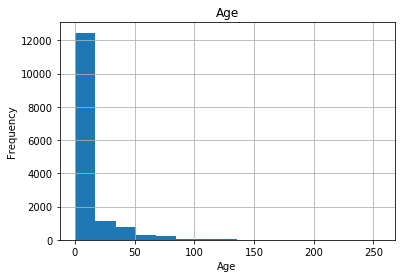

In [93]:
df.hist(column='Age', bins=15)
plt.xlabel("Age")
plt.ylabel("Frequency")

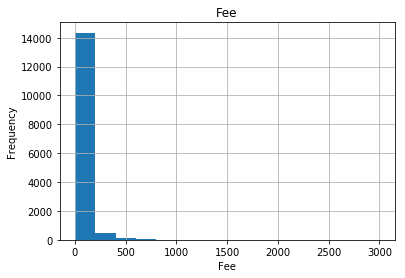

In [94]:
df.hist(column='Fee', bins='auto')

plt.xlabel("Fee")
plt.ylabel("Frequency")

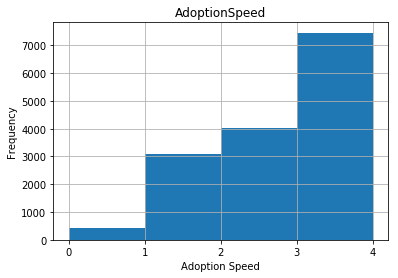

In [95]:
df.hist(column='AdoptionSpeed', bins=4)
plt.xticks(range(0, 5))
plt.xlabel("Adoption Speed")
plt.ylabel("Frequency")


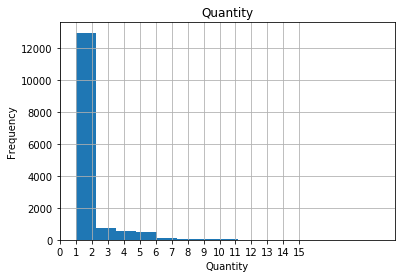

In [96]:
df.hist(column='Quantity', bins=15)
plt.xticks(range(0, 16))
plt.xlabel("Quantity")
plt.ylabel("Frequency")

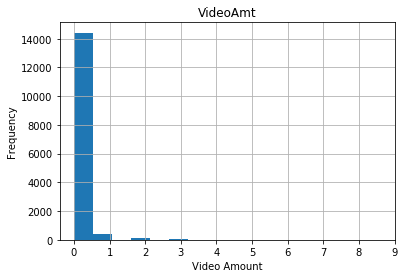

In [97]:
df.hist(column='VideoAmt', bins=15)
plt.xticks(range(0, 10))
plt.xlabel("Video Amount")
plt.ylabel("Frequency")

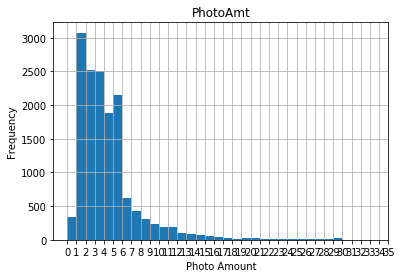

In [98]:
df.hist(column='PhotoAmt', bins=30)
plt.xticks(range(0, 36))
plt.xlabel("Photo Amount")
plt.ylabel("Frequency")

KeyboardInterrupt: 

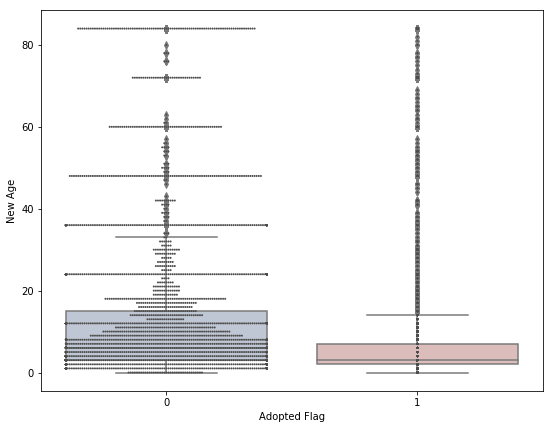

In [99]:
f, ax = plt.subplots(figsize=(9,7))
sns.boxplot(x='Adopted Flag', y='New Age', data=pd_train_new, palette='vlag')
sns.swarmplot(x='Adopted Flag', y='New Age', data=pd_train_new, size=2, color='0.3')
plt.title('Age by Adopted Flag', size=14)
plt.xlabel('AdoptionSpeed', size=12)
plt.ylabel('Age', size=12)
plt.show()

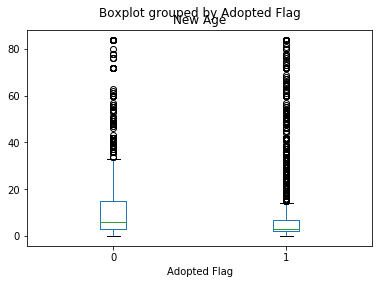

In [101]:
pd_train_new.boxplot(by='Adopted Flag', 
                       column=['New Age'], 
                       grid=False)

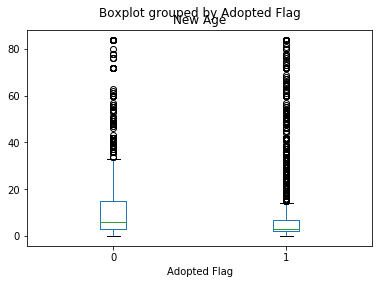

In [102]:
boxplot = pd_train_new.boxplot(by='Adopted Flag',column=['New Age'],grid=False) 

## Model 

In [103]:
pd_train_new.dtypes

Type                    int64
Name                   object
Age                     int64
Breed1                  int64
Breed2                  int64
Gender                  int64
Color1                  int64
Color2                  int64
Color3                  int64
MaturitySize            int64
FurLength               int64
Vaccinated              int64
Dewormed                int64
Sterilized              int64
Health                  int64
Quantity                int64
Fee                     int64
State                   int64
RescuerID              object
VideoAmt                int64
Description            object
PetID                  object
PhotoAmt              float64
AdoptionSpeed           int64
BreedName B1           object
Energetic Level B1     object
Personality B1         object
Vocalize B1           float64
Playfulness B1        float64
StateName              object
Population            float64
Breed1 New              int64
MixedBreed              int64
Fee Flag  

### We will split the model into dogs and cats, and then run the model separately.

In [104]:
pd_model_all=pd_train_new[['Type','New Age','Gender','Color1','Color2','Color3','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized', 'Health','Quantity','State','Fee Flag','Adopted Flag','Video Flag','Photo Flag','Photo Flag','Name Flag','Description Flag','Personality B1','Vocalize B1','Playfulness B1','Energetic Level B1','AdoptionSpeed']]

In [105]:
pd_model_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 26 columns):
Type                  14993 non-null int64
New Age               14993 non-null int64
Gender                14993 non-null int64
Color1                14993 non-null int64
Color2                14993 non-null int64
Color3                14993 non-null int64
MaturitySize          14993 non-null int64
FurLength             14993 non-null int64
Vaccinated            14993 non-null int64
Dewormed              14993 non-null int64
Sterilized            14993 non-null int64
Health                14993 non-null int64
Quantity              14993 non-null int64
State                 14993 non-null int64
Fee Flag              14993 non-null int64
Adopted Flag          14993 non-null int64
Video Flag            14993 non-null int64
Photo Flag            14993 non-null int64
Photo Flag            14993 non-null int64
Name Flag             14993 non-null int64
Description Flag      14993 non

In [133]:
pd_model_dog=pd_model_all.loc[pd_model_all['Type'] == 1]
pd_model_dog.drop(['Personality B1','Vocalize B1','Playfulness B1'],axis=1,inplace=True)
pd_model_dog['Energetic Level B1'] = np.where(pd_model_dog['Energetic Level B1'].isnull(), 'Other', pd_model_dog['Energetic Level B1'] )
pd_model_dog['Energetic Level B1'] = np.where(pd_model_dog['Energetic Level B1']=='N.A.', 'Other', pd_model_dog['Energetic Level B1'])

/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

In [134]:
pd_model_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8132 entries, 2 to 14992
Data columns (total 23 columns):
Type                  8132 non-null int64
New Age               8132 non-null int64
Gender                8132 non-null int64
Color1                8132 non-null int64
Color2                8132 non-null int64
Color3                8132 non-null int64
MaturitySize          8132 non-null int64
FurLength             8132 non-null int64
Vaccinated            8132 non-null int64
Dewormed              8132 non-null int64
Sterilized            8132 non-null int64
Health                8132 non-null int64
Quantity              8132 non-null int64
State                 8132 non-null int64
Fee Flag              8132 non-null int64
Adopted Flag          8132 non-null int64
Video Flag            8132 non-null int64
Photo Flag            8132 non-null int64
Photo Flag            8132 non-null int64
Name Flag             8132 non-null int64
Description Flag      8132 non-null int64
Energetic 

In [135]:
pd_model_dog_dummies = pd.concat([pd_model_dog, pd.get_dummies(pd_model_dog['Energetic Level B1'])], axis=1)
pd_model_dog_dummies.drop(['Energetic Level B1'],axis=1,inplace=True)
#pd_model_dog_dummies.head()

pd_model_dog_dummies = pd_model_dog_dummies.astype('int64', copy=False)
pd_model_dog_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8132 entries, 2 to 14992
Data columns (total 27 columns):
Type                        8132 non-null int64
New Age                     8132 non-null int64
Gender                      8132 non-null int64
Color1                      8132 non-null int64
Color2                      8132 non-null int64
Color3                      8132 non-null int64
MaturitySize                8132 non-null int64
FurLength                   8132 non-null int64
Vaccinated                  8132 non-null int64
Dewormed                    8132 non-null int64
Sterilized                  8132 non-null int64
Health                      8132 non-null int64
Quantity                    8132 non-null int64
State                       8132 non-null int64
Fee Flag                    8132 non-null int64
Adopted Flag                8132 non-null int64
Video Flag                  8132 non-null int64
Photo Flag                  8132 non-null int64
Photo Flag                  

In [127]:
pd_model_cat=pd_model_all.loc[pd_model_all['Type'] == 2]

In [128]:
pd_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6861 entries, 0 to 14991
Data columns (total 26 columns):
Type                  6861 non-null int64
New Age               6861 non-null int64
Gender                6861 non-null int64
Color1                6861 non-null int64
Color2                6861 non-null int64
Color3                6861 non-null int64
MaturitySize          6861 non-null int64
FurLength             6861 non-null int64
Vaccinated            6861 non-null int64
Dewormed              6861 non-null int64
Sterilized            6861 non-null int64
Health                6861 non-null int64
Quantity              6861 non-null int64
State                 6861 non-null int64
Fee Flag              6861 non-null int64
Adopted Flag          6861 non-null int64
Video Flag            6861 non-null int64
Photo Flag            6861 non-null int64
Photo Flag            6861 non-null int64
Name Flag             6861 non-null int64
Description Flag      6861 non-null int64
Personalit

In [129]:
pd_model_cat.drop(['Energetic Level B1'],axis=1,inplace=True)
pd_model_cat['Vocalize B1'] = np.where(pd_model_cat['Vocalize B1']==9, 99, pd_model_cat['Vocalize B1'])
pd_model_cat['Playfulness B1'] = np.where(pd_model_cat['Playfulness B1']==9, 99, pd_model_cat['Playfulness B1'])
pd_model_cat['Vocalize B1'] = np.where(pd_model_cat['Vocalize B1'].isnull(), 99, pd_model_cat['Vocalize B1'] )
pd_model_cat['Playfulness B1'] = np.where(pd_model_cat['Playfulness B1'].isnull(), 99, pd_model_cat['Playfulness B1'] )
pd_model_cat['Personality B1'] = np.where(pd_model_cat['Personality B1'].isnull(), 'Other', pd_model_cat['Personality B1'])

/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [130]:
pd_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6861 entries, 0 to 14991
Data columns (total 25 columns):
Type                6861 non-null int64
New Age             6861 non-null int64
Gender              6861 non-null int64
Color1              6861 non-null int64
Color2              6861 non-null int64
Color3              6861 non-null int64
MaturitySize        6861 non-null int64
FurLength           6861 non-null int64
Vaccinated          6861 non-null int64
Dewormed            6861 non-null int64
Sterilized          6861 non-null int64
Health              6861 non-null int64
Quantity            6861 non-null int64
State               6861 non-null int64
Fee Flag            6861 non-null int64
Adopted Flag        6861 non-null int64
Video Flag          6861 non-null int64
Photo Flag          6861 non-null int64
Photo Flag          6861 non-null int64
Name Flag           6861 non-null int64
Description Flag    6861 non-null int64
Personality B1      6861 non-null object
Vocalize B1

In [ ]:
#print(pd_model_cat[pd_model_cat.isnull().any(axis=1)]['Personality B1'])

In [131]:
pd_model_cat_dummies = pd.concat([pd_model_cat, pd.get_dummies(pd_model_cat['Personality B1'])], axis=1)
pd_model_cat_dummies.drop(['Personality B1'],axis=1,inplace=True)
pd_model_cat_dummies.head()

Type  New Age  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  Quantity  State  Fee Flag  Adopted Flag  Video Flag  Photo Flag  Photo Flag  Name Flag  Description Flag  Vocalize B1  Playfulness B1  AdoptionSpeed  Active  Affectionate  Busy  Energetic  Even Tempered  Intelligent  Other  Powerful  Quiet  Sweet  Vocal
0     2        3       1       1       7       0             1          1           2         2           2       1         1  41326         1             1           0           1           1          1                 1         99.0            99.0              2       0             0     0          0              0            0      1         0      0      0      0
1     2        1       1       1       2       0             2          2           3         3           3       1         1  41401         0             1           0           1           1          1                 1         99.0            99.0              0       0             0     0          0              0            0      1         0      0      0      0
5     2        3       2       5       6       0             2          1           2         2           2       1         1  41326         0             1           0           1           1          0                 1         99.0            99.0              2       0             0     0          0              0            0      1         0      0      0      0
6     2       12       1       1       0       0             2          3           2         2           3       1         1  41326         1             1           0           1           1          1                 1         99.0            99.0              1       0             0     0          0              0            0      1         0      0      0      0
8     2        2       2       6       0       0             2          2           2         2           2       1         1  41326         0             1           0           1           1          0                 1         99.0            99.0              1       0             0     0          0              0            0      1         0      0      0      0

/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


KeyboardInterrupt: 

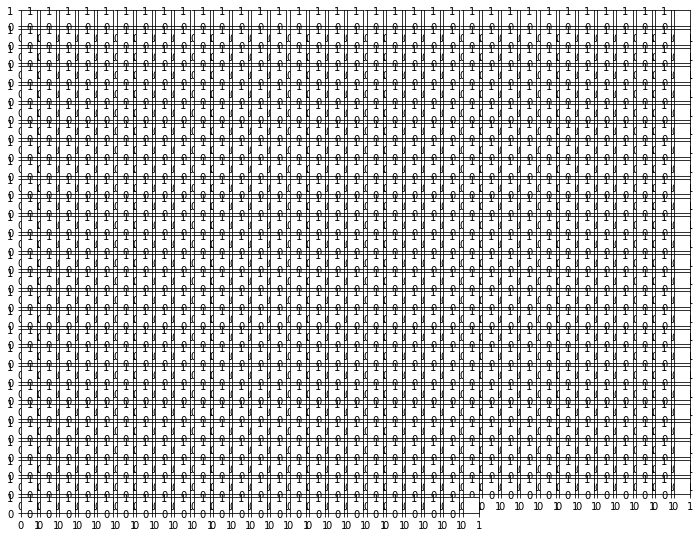

In [132]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(pd_model_cat_dummies,alpha=0.2,figsize=(12, 12))
plt.show()

## Missing values have been processed and now the dataset has been processed, we will split the data into training and testing for the models.

In [138]:
y_dog = pd_model_dog_dummies[['AdoptionSpeed']]
#X_dog = pd_model_dog_dummies[['Type','New Age','Gender','Color1','Color2','Color3','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized', 'Health','Quantity','State','Fee Flag','Video Flag','Photo Flag','Photo Flag','Name Flag','Description Flag','Calm','Energetic','Needs a Lot of Activity','Other','Regular Exercise']]
X_dog=pd_model_dog_dummies.drop(['AdoptionSpeed'],axis=1)
X_dog=X_dog.drop(['Adopted Flag'],axis=1)
X_dog.head()

Type  New Age  Gender  Color1  Color2  Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  Quantity  State  Fee Flag  Video Flag  Photo Flag  Photo Flag  Name Flag  Description Flag  Calm  Energetic  Needs a Lot of Activity   Other  Regular Exercise
2      1        1       1       2       7       0             2          2           1         1           2       1         1  41326         0           0           1           1          1                 1     0          0                         0      1                 0
3      1        4       2       1       2       0             2          1           1         1           2       1         1  41401         1           0           1           1          1                 1     0          0                         0      1                 0
4      1        1       1       1       0       0             2          1           2         2           2       1         1  41326         0           0           1           1          1                 1     0          0                         0      1                 0
7      1        0       2       1       2       7             2          1           2         2           2       1         6  41326         0           0           1           1          1                 1     0          0                         0      1                 0
10     1        2       1       1       2       7             2          1           2         1           2       1         1  41401         0           0           1           1          1                 1     0          0                         0      1                 0

In [139]:
from sklearn.model_selection import train_test_split
X_train_dog, X_test_dog, y_train_dog, y_test_dog = train_test_split(X_dog , y_dog, test_size=0.3)
print('X_train Shape:', X_train_dog.shape)
print('X_test Shape:', X_test_dog.shape)
print('y_train Shape:', y_train_dog.shape)
print('y_test Shape:', y_test_dog.shape)

X_train Shape: (5692, 25)
X_test Shape: (2440, 25)
y_train Shape: (5692, 1)
y_test Shape: (2440, 1)


In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report, accuracy_score, confusion_matrix
%matplotlib inline

/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_

/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score 0.37991803278688524


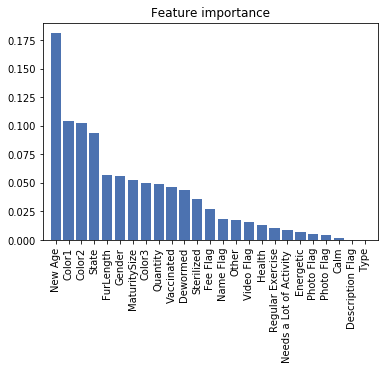

In [141]:
for i in range(1,30):
    random_forest = RandomForestClassifier(n_estimators=i,n_jobs=-1)
    random_forest.fit(X_train_dog, y_train_dog)
    pred = random_forest.predict(X_test_dog)
    acc = accuracy_score(y_test_dog, pred)
print("Accuracy Score {}".format(acc))

#Graph most important features 
importances = random_forest.feature_importances_
features = X_dog.columns[:]
sort_indices = np.argsort(importances)[::-1]
sorted_features = []
for idx in sort_indices:
    sorted_features.append(features[idx])
plt.figure()
plt.bar(range(len(importances)), importances[sort_indices], align='center', color ='#4C72B0');
plt.xticks(range(len(importances)), sorted_features, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.title('Feature importance')
plt.grid(False)

In [142]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_dog, y_train_dog)

expected  = y_test_dog
predicted = model.predict(X_test_dog)

# Evaluate fit of the model
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 1.274
Coefficient of Determination: 0.052


/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Let's look at random forest at cats data.

In [143]:
y_cat = pd_model_cat_dummies[['AdoptionSpeed']]
X_cat = pd_model_cat_dummies[['Type','New Age','Gender','Color1','Color2','Color3','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized', 'Health','Quantity','State','Fee Flag','Video Flag','Photo Flag','Photo Flag','Name Flag','Description Flag','Vocalize B1','Playfulness B1','Active','Affectionate','Busy','Energetic','Even Tempered','Intelligent','Other','Powerful','Quiet','Sweet','Vocal']]

In [144]:
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat , y_cat, test_size=0.3)
print('X_train Shape:', X_train_cat.shape)
print('X_test Shape:', X_test_cat.shape)
print('y_train Shape:', y_train_cat.shape)
print('y_test Shape:', y_test_cat.shape)

X_train Shape: (4802, 35)
X_test Shape: (2059, 35)
y_train Shape: (4802, 1)
y_test Shape: (2059, 1)


/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_

/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score 0.33997085964060225


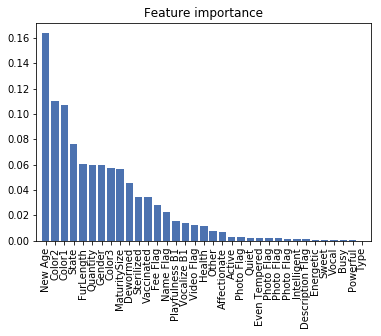

In [145]:
for i in range(1,30):
    random_forest = RandomForestClassifier(n_estimators=i,n_jobs=-1)
    random_forest.fit(X_train_cat, y_train_cat)
    pred = random_forest.predict(X_test_cat)
    acc = accuracy_score(y_test_cat, pred)
print("Accuracy Score {}".format(acc))

#Graph most important features 
importances = random_forest.feature_importances_
features = X_cat.columns[:]
sort_indices = np.argsort(importances)[::-1]
sorted_features = []
for idx in sort_indices:
    sorted_features.append(features[idx])
plt.figure()
plt.bar(range(len(importances)), importances[sort_indices], align='center', color ='#4C72B0');
plt.xticks(range(len(importances)), sorted_features, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.title('Feature importance')
plt.grid(False)

In [146]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_cat, y_train_cat)

expected  = y_test_cat
predicted = model.predict(X_test_cat)

# Evaluate fit of the model
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 1.461
Coefficient of Determination: 0.022


/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [148]:
#from sklearn.tree import DecisionTreeClassifier
#decision_tree = DecisionTreeClassifier(max_depth= 10) # or criterion = "entropy", default = gini
#decision_tree.fit(X_train_cat, y_train_cat)

#expected = y_test_cat
#predicted = decision_tree.predict(X_test_cat)
#print("Decision Tree Classifier - results: \n")
#acc = accuracy_score(y_test_cat, predicted)
##print(confusion_matrix(y_test, predicted))
#print(classification_report(expected, predicted))
#print("Accuracy score: {}".format(acc))
#print('Training Score: %.2f%%' % (decision_tree.score(X_train_cat, y_train_cat) * 100))
#print('Test Score: %.2f%%' % (decision_tree.score(X_test_cat, y_test_cat) * 100))
##plot_confusion_matrix(confusion_matrix(y_test_cat, predicted), classes = ["etable", "poisonous"], title = "Decision Tree confusion matrix")
##help(DecisionTreeClassifier)

Decision Tree Classifier - results: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.31      0.29      0.30       524
           2       0.29      0.39      0.33       535
           3       0.22      0.10      0.14       384
           4       0.41      0.52      0.46       538

   micro avg       0.33      0.33      0.33      2059
   macro avg       0.25      0.26      0.25      2059
weighted avg       0.31      0.33      0.31      2059

Accuracy score: 0.3302574065080136
Training Score: 49.21%
Test Score: 33.03%


### Random Forests for both cats and dogs have poor performance. Let's look at KNN.

In [149]:
from sklearn import preprocessing

In [187]:
X_dog_KNN= preprocessing.StandardScaler().fit(X_dog).transform(X_dog.astype(float))
X_dog_KNN[0:5]

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.        , -0.59626763, -1.15475916, -0.04869577,  1.66627481,
        -0.50481583,  0.10263625,  0.91305262, -0.92774503, -0.74178058,
         0.14962349, -0.18568589, -0.34294371, -0.54115097, -0.41423316,
        -0.19874334,  0.15633108,  0.15633108,  0.29449944,  0.01921065,
        -0.07705618, -0.26083054, -0.29103358,  0.55973877, -0.3161636 ],
       [ 0.        , -0.44038451,  0.4098029 , -0.67626161, -0.2282147 ,
        -0.50481583,  0.10263625, -0.79618861, -0.92774503, -0.74178058,
         0.14962349, -0.18568589, -0.34294371,  1.94624786,  2.41409936,
        -0.19874334,  0.15633108,  0.15633108,  0.29449944,  0.01921065,
        -0.07705618, -0.26083054, -0.29103358,  0.55973877, -0.3161636 ],
       [ 0.        , -0.59626763, -1.15475916, -0.67626161, -0.9860105 ,
        -0.50481583,  0.10263625, -0.79618861,  0.4608842 ,  0.62574598,
         0.14962349, -0.18568589, -0.34294371, -0.54115097, -0.41423316,
        -0.19874334,  0.15633108,  0.15633108,  0

In [188]:
X_train_dog_knn, X_test_dog_knn, y_train_dog_knn, y_test_dog_knn = train_test_split( X_dog_KNN, y_dog, test_size=0.3, random_state=4)
print ('Train set:', X_train_dog_knn.shape,  y_train_dog_knn.shape)
print ('Test set:', X_test_dog_knn.shape,  y_test_dog_knn.shape)

Train set: (5692, 25) (5692, 1)
Test set: (2440, 25) (2440, 1)


In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 10
#Train Model and Predict  
neigh_dog = KNeighborsClassifier(n_neighbors = k).fit(X_train_dog_knn,y_train_dog_knn)
neigh_dog

yhat_dog = neigh_dog.predict(X_test_dog_knn)

print("Train set Accuracy: ", metrics.accuracy_score(y_train_dog_knn, neigh_dog.predict(X_train_dog_knn)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_dog_knn, yhat_dog))

/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Train set Accuracy:  0.4747013352073085
Test set Accuracy:  0.335655737704918


In [193]:
expected_dog = y_test_dog_knn
print(classification_report(expected_dog, yhat_dog))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.27      0.28      0.27       437
           2       0.28      0.37      0.32       624
           3       0.30      0.24      0.27       586
           4       0.48      0.44      0.46       740

   micro avg       0.34      0.34      0.34      2440
   macro avg       0.27      0.27      0.26      2440
weighted avg       0.34      0.34      0.33      2440



### Try to find the best k within 20.

In [198]:
from sklearn.model_selection import cross_val_score
myList_dog = list(range(1,20))

# subsetting just the odd ones
neighbors_dog = list(filter(lambda x: x % 2 != 0, myList_dog))

# empty list that will hold cv scores
cv_scores_dog = []

# perform 10-fold cross validation
for k in neighbors_dog:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_dog_knn, y_train_dog_knn, cv=10, scoring='accuracy')
    cv_scores_dog.append(scores.mean())

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConv

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConv

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConv

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConv

The optimal number of neighbors is 17


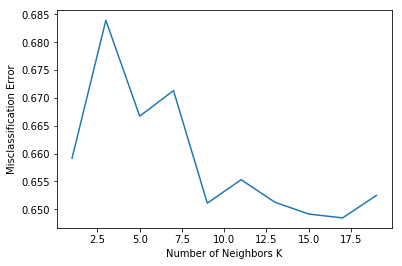

In [200]:
MSE_dog = [1 - x for x in cv_scores_dog]

# determining best k
optimal_k = neighbors_dog[MSE_dog.index(min(MSE_dog))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors_dog, MSE_dog)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Now, let's apply KNN to cat data.

In [156]:
X_cat_KNN= preprocessing.StandardScaler().fit(X_cat).transform(X_cat.astype(float))
X_cat_KNN[0:5]

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.        , -0.3830353 , -1.13117678, -0.75011357,  1.13496129,
        -0.78491137, -1.30634839, -0.76308574,  0.32836011,  0.64840721,
         0.15468364, -0.18095225, -0.45614918, -0.70905646,  2.24136231,
        -0.20043918,  0.14796807,  0.14796807,  0.14796807,  0.14796807,
         0.31182259,  0.03624204,  0.37901886,  0.40550363, -0.11133223,
        -0.32733564, -0.03195781, -0.04983902, -0.12099851, -0.06047404,
         0.40967034, -0.02091519, -0.10441838, -0.03416683, -0.02700534],
       [ 0.        , -0.55700626, -1.13117678, -0.75011357, -0.73071733,
        -0.78491137,  0.41363939,  0.86235085,  2.02098123,  2.18509869,
         2.04983451, -0.18095225, -0.45614918,  1.46796775, -0.44615723,
        -0.20043918,  0.14796807,  0.14796807,  0.14796807,  0.14796807,
         0.31182259,  0.03624204,  0.37901886,  0.40550363, -0.11133223,
        -0.32733564, -0.03195781, -0.04983902, -0.12099851, -0.06047404,
         0.40967034, -0.02091519, -0.10441838, -0.

In [157]:
X_train_cat_knn, X_test_cat_knn, y_train_cat_knn, y_test_cat_knn = train_test_split( X_cat_KNN, y_cat, test_size=0.3, random_state=4)
print ('Train set:', X_train_cat_knn.shape,  y_train_cat_knn.shape)
print ('Test set:', X_test_cat_knn.shape,  y_test_cat_knn.shape)

Train set: (4802, 35) (4802, 1)
Test set: (2059, 35) (2059, 1)


In [184]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_cat_knn,y_train_cat_knn)
neigh

yhat = neigh.predict(X_test_cat_knn)

print("Train set Accuracy: ", metrics.accuracy_score(y_train_cat_knn, neigh.predict(X_train_cat_knn)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_cat_knn, yhat))

/Users/Cykie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Train set Accuracy:  0.4408579758433986
Test set Accuracy:  0.32200097134531325


In [192]:
expected = y_test_cat_knn
print(classification_report(expected, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.30      0.41      0.35       498
           2       0.30      0.36      0.33       574
           3       0.23      0.16      0.19       388
           4       0.45      0.36      0.40       532

   micro avg       0.32      0.32      0.32      2059
   macro avg       0.26      0.26      0.25      2059
weighted avg       0.32      0.32      0.31      2059



In [196]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_cat_knn, y_train_cat_knn, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConv

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConv

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConv

/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Cykie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConv

The optimal number of neighbors is 19


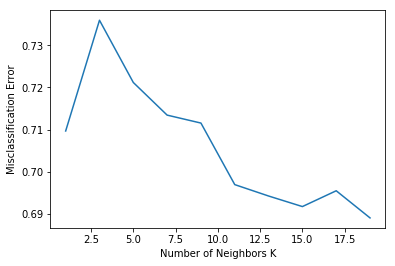

In [199]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()